# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('daily_csv.csv') #read the dataset

In [3]:
dataset.head()

,Date,Price
0,07-01-1997,3.82
1,08-01-1997,3.80
2,09-01-1997,3.61
3,10-01-1997,3.92
4,13-01-1997,4.00


In [4]:
#splitting the year,month and day into seperate columns
dataset['Year'] = pd.DatetimeIndex(dataset['Date']).year 
dataset['Month'] = pd.DatetimeIndex(dataset['Date']).month
dataset['Day'] = pd.DatetimeIndex(dataset['Date']).day

In [5]:
dataset.head()

,Date,Price,Year,Month,Day
0,07-01-1997,3.82,1997,7,1
1,08-01-1997,3.80,1997,8,1
2,09-01-1997,3.61,1997,9,1
3,10-01-1997,3.92,1997,10,1
4,13-01-1997,4.00,1997,1,13


In [6]:
dataset.drop('Date',axis=1,inplace=True) # deleting the date column as it is unnecessary

In [7]:
dataset.head()

,Price,Year,Month,Day
0,3.82,1997,7,1
1,3.80,1997,8,1
2,3.61,1997,9,1
3,3.92,1997,10,1
4,4.00,1997,1,13


In [8]:
dataset.isnull().any() 

Price     True
Year     False
Month    False
Day      False
dtype: bool

In [9]:
dataset.isnull().sum()

Price    1
Year     0
Month    0
Day      0
dtype: int64

In [10]:
#handling of null values
dataset['Price'].fillna(dataset['Price'].mean(),inplace=True) 

In [11]:
dataset.isnull().any()

Price    False
Year     False
Month    False
Day      False
dtype: bool

# Data visualization

In [55]:
import seaborn as sns

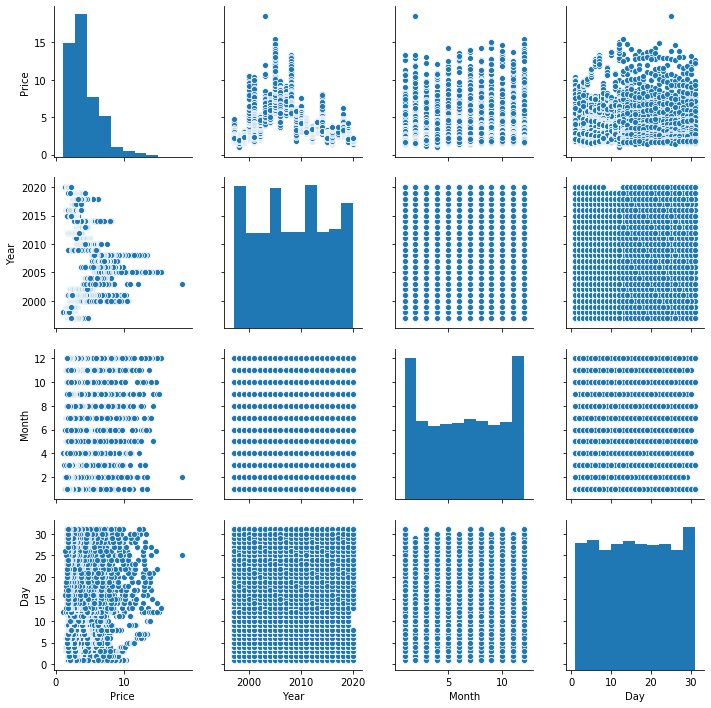

In [57]:
sns.pairplot(dataset) # shows the relation between all combinations of columns

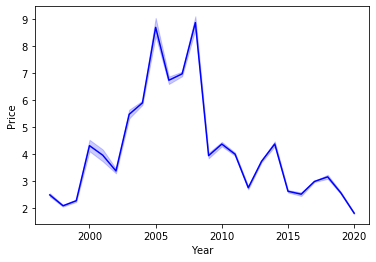

In [59]:
sns.lineplot(x='Year',y='Price',data=dataset,color='blue')

In [ ]:
# it can be inferred that the price of natural gas was highest between 2005-2008

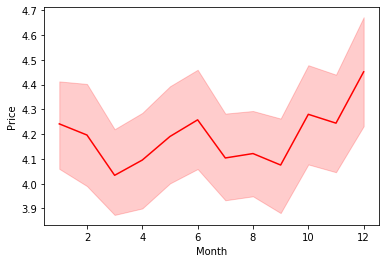

In [60]:
sns.lineplot(x='Month',y='Price',data=dataset,color='red')

In [ ]:
# the trend shows that that the month of december had higher gas prices than the rest

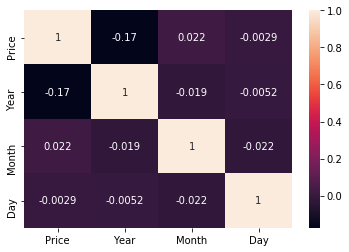

In [62]:
sns.heatmap(dataset.corr(),annot=True)

In [ ]:
#there is no strong correlation between any of the factors

In [12]:
x=dataset.iloc[:,1:4].values
y=dataset.iloc[:,0:1].values

In [13]:
x

array([[1997,    7,    1],
       [1997,    8,    1],
       [1997,    9,    1],
       ...,
       [2020,    7,    8],
       [2020,   10,    8],
       [2020,   11,    8]], dtype=int64)

In [14]:
y

array([[3.82],
       [3.8 ],
       [3.61],
       ...,
       [2.15],
       [2.18],
       [2.19]])

In [15]:
#splitting the data into train and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
#standard scaling for better model training
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [17]:
x_train

array([[-0.19490987,  0.43243236,  0.6201062 ],
       [-1.50916803,  1.30923389, -1.42617247],
       [ 0.24317619,  0.43243236,  1.0748348 ],
       ...,
       [-0.77902461,  0.43243236, -0.28935098],
       [-0.19490987, -0.15210199,  0.73378835],
       [-0.19490987,  1.60150107,  0.39274191]])

In [18]:
x_test

array([[ 0.0971475 ,  0.72469954,  0.96115265],
       [ 1.41140567,  0.72469954,  0.6201062 ],
       [-0.04888118, -1.02890352, -0.74407958],
       ...,
       [ 0.53523356, -1.02890352,  1.30219909],
       [ 0.0971475 , -0.15210199,  0.73378835],
       [-0.77902461,  1.30923389,  0.39274191]])

# Creating the model for price prediction-regression

In [19]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout

In [20]:
reg=Sequential()

In [21]:
reg.add(Dense(units=3,kernel_initializer="random_uniform",activation="relu"))

In [22]:
reg.add(Dense(units=100,kernel_initializer="random_uniform",activation="relu"))

In [23]:
reg.add(Dense(units=100,kernel_initializer="random_uniform",activation="relu"))

In [24]:
reg.add(Dense(units=1,kernel_initializer="random_uniform"))

In [25]:
reg.compile(optimizer="rmsprop",loss="mse",metrics=['mse'])

In [44]:
history= reg.fit(x_train,y_train,batch_size=200,epochs=4000,validation_data=(x_test,y_test))

Epoch 1/4000
24/24 [==============================] - 0s 7ms/step - loss: 0.4978 - mse: 0.4978 - val_loss: 0.5590 - val_mse: 0.5590
Epoch 2/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.5080 - mse: 0.5080 - val_loss: 0.5768 - val_mse: 0.5768
Epoch 3/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.5050 - mse: 0.5050 - val_loss: 0.5333 - val_mse: 0.5333
Epoch 4/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.5083 - mse: 0.5083 - val_loss: 0.5169 - val_mse: 0.5169
Epoch 5/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.5081 - mse: 0.5081 - val_loss: 0.5469 - val_mse: 0.5469
Epoch 6/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.5133 - mse: 0.5133 - val_loss: 0.5664 - val_mse: 0.5664
Epoch 7/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.5061 - mse: 0.5061 - val_loss: 0.5389 - val_mse: 0.5389
Epoch 8/4000
24/24 [==============================] - 0s 6ms/step - loss: 0.

24/24 [==============================] - 0s 5ms/step - loss: 0.4954 - mse: 0.4954 - val_loss: 0.5256 - val_mse: 0.5256
Epoch 124/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.5019 - mse: 0.5019 - val_loss: 0.5381 - val_mse: 0.5381
Epoch 125/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.5027 - mse: 0.5027 - val_loss: 0.5677 - val_mse: 0.5677
Epoch 126/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4945 - mse: 0.4945 - val_loss: 0.5307 - val_mse: 0.5307
Epoch 127/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.5005 - mse: 0.5005 - val_loss: 0.5219 - val_mse: 0.5219
Epoch 128/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4924 - mse: 0.4924 - val_loss: 0.5742 - val_mse: 0.5742
Epoch 129/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4946 - mse: 0.4946 - val_loss: 0.5134 - val_mse: 0.5134
Epoch 130/4000
24/24 [==============================] - 0s 5ms/step - loss: 0

Epoch 245/4000
24/24 [==============================] - 0s 6ms/step - loss: 0.4902 - mse: 0.4902 - val_loss: 0.5509 - val_mse: 0.5509
Epoch 246/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4938 - mse: 0.4938 - val_loss: 0.5879 - val_mse: 0.5879
Epoch 247/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4923 - mse: 0.4923 - val_loss: 0.5247 - val_mse: 0.5247
Epoch 248/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.5006 - mse: 0.5006 - val_loss: 0.5563 - val_mse: 0.5563
Epoch 249/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.5014 - mse: 0.5014 - val_loss: 0.6388 - val_mse: 0.6388
Epoch 250/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4763 - mse: 0.4763 - val_loss: 0.5568 - val_mse: 0.5568
Epoch 251/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4936 - mse: 0.4936 - val_loss: 0.5596 - val_mse: 0.5596
Epoch 252/4000
24/24 [==============================] - 0s 5ms

24/24 [==============================] - 0s 5ms/step - loss: 0.4956 - mse: 0.4956 - val_loss: 0.6120 - val_mse: 0.6120
Epoch 368/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4975 - mse: 0.4975 - val_loss: 0.5176 - val_mse: 0.5176
Epoch 369/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4902 - mse: 0.4902 - val_loss: 0.5868 - val_mse: 0.5868
Epoch 370/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4996 - mse: 0.4996 - val_loss: 0.5272 - val_mse: 0.5272
Epoch 371/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4934 - mse: 0.4934 - val_loss: 0.5107 - val_mse: 0.5107
Epoch 372/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4838 - mse: 0.4838 - val_loss: 0.5478 - val_mse: 0.5478
Epoch 373/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4961 - mse: 0.4961 - val_loss: 0.5088 - val_mse: 0.5088
Epoch 374/4000
24/24 [==============================] - 0s 5ms/step - loss: 0

Epoch 489/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4762 - mse: 0.4762 - val_loss: 0.6324 - val_mse: 0.6324
Epoch 490/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4770 - mse: 0.4770 - val_loss: 0.5651 - val_mse: 0.5651
Epoch 491/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4914 - mse: 0.4914 - val_loss: 0.5005 - val_mse: 0.5005
Epoch 492/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4896 - mse: 0.4896 - val_loss: 0.5295 - val_mse: 0.5295
Epoch 493/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4745 - mse: 0.4745 - val_loss: 0.5546 - val_mse: 0.5546
Epoch 494/4000
24/24 [==============================] - 0s 4ms/step - loss: 0.4867 - mse: 0.4867 - val_loss: 0.5156 - val_mse: 0.5156
Epoch 495/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4976 - mse: 0.4976 - val_loss: 0.5056 - val_mse: 0.5056
Epoch 496/4000
24/24 [==============================] - 0s 5ms

Epoch 611/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4800 - mse: 0.4800 - val_loss: 0.5220 - val_mse: 0.5220
Epoch 612/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4943 - mse: 0.4943 - val_loss: 0.4961 - val_mse: 0.4961
Epoch 613/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4737 - mse: 0.4737 - val_loss: 0.5203 - val_mse: 0.5203
Epoch 614/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4777 - mse: 0.4777 - val_loss: 0.5395 - val_mse: 0.5395
Epoch 615/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4844 - mse: 0.4844 - val_loss: 0.5616 - val_mse: 0.5616
Epoch 616/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4826 - mse: 0.4826 - val_loss: 0.5423 - val_mse: 0.5423
Epoch 617/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4830 - mse: 0.4830 - val_loss: 0.5050 - val_mse: 0.5050
Epoch 618/4000
24/24 [==============================] - 0s 5ms

Epoch 672/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4681 - mse: 0.4681 - val_loss: 0.4914 - val_mse: 0.4914
Epoch 673/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4854 - mse: 0.4854 - val_loss: 0.5110 - val_mse: 0.5110
Epoch 674/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4788 - mse: 0.4788 - val_loss: 0.5112 - val_mse: 0.5112
Epoch 675/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4810 - mse: 0.4810 - val_loss: 0.5330 - val_mse: 0.5330
Epoch 676/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4810 - mse: 0.4810 - val_loss: 0.5103 - val_mse: 0.5103
Epoch 677/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4770 - mse: 0.4770 - val_loss: 0.5022 - val_mse: 0.5022
Epoch 678/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4787 - mse: 0.4787 - val_loss: 0.5428 - val_mse: 0.5428
Epoch 679/4000
24/24 [==============================] - 0s 5ms

24/24 [==============================] - 0s 6ms/step - loss: 0.4734 - mse: 0.4734 - val_loss: 0.5392 - val_mse: 0.5392
Epoch 795/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4664 - mse: 0.4664 - val_loss: 0.4906 - val_mse: 0.4906
Epoch 796/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4710 - mse: 0.4710 - val_loss: 0.5047 - val_mse: 0.5047
Epoch 797/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4738 - mse: 0.4738 - val_loss: 0.5408 - val_mse: 0.5408
Epoch 798/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4800 - mse: 0.4800 - val_loss: 0.5317 - val_mse: 0.5317
Epoch 799/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4771 - mse: 0.4771 - val_loss: 0.5452 - val_mse: 0.5452
Epoch 800/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4801 - mse: 0.4801 - val_loss: 0.5124 - val_mse: 0.5124
Epoch 801/4000
24/24 [==============================] - 0s 5ms/step - loss: 0

24/24 [==============================] - 0s 5ms/step - loss: 0.4716 - mse: 0.4716 - val_loss: 0.4945 - val_mse: 0.4945
Epoch 917/4000
24/24 [==============================] - 0s 6ms/step - loss: 0.4670 - mse: 0.4670 - val_loss: 0.5013 - val_mse: 0.5013
Epoch 918/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4699 - mse: 0.4699 - val_loss: 0.5411 - val_mse: 0.5411
Epoch 919/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4683 - mse: 0.4683 - val_loss: 0.5119 - val_mse: 0.5119
Epoch 920/4000
24/24 [==============================] - 0s 4ms/step - loss: 0.4665 - mse: 0.4665 - val_loss: 0.5647 - val_mse: 0.5647
Epoch 921/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4765 - mse: 0.4765 - val_loss: 0.5206 - val_mse: 0.5206
Epoch 922/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4710 - mse: 0.4710 - val_loss: 0.5217 - val_mse: 0.5217
Epoch 923/4000
24/24 [==============================] - 0s 5ms/step - loss: 0

Epoch 1038/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4731 - mse: 0.4731 - val_loss: 0.4724 - val_mse: 0.4724
Epoch 1039/4000
24/24 [==============================] - 0s 4ms/step - loss: 0.4604 - mse: 0.4604 - val_loss: 0.5346 - val_mse: 0.5346
Epoch 1040/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4648 - mse: 0.4648 - val_loss: 0.5081 - val_mse: 0.5081
Epoch 1041/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4640 - mse: 0.4640 - val_loss: 0.5076 - val_mse: 0.5076
Epoch 1042/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4655 - mse: 0.4655 - val_loss: 0.5203 - val_mse: 0.5203
Epoch 1043/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4699 - mse: 0.4699 - val_loss: 0.4786 - val_mse: 0.4786
Epoch 1044/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4733 - mse: 0.4733 - val_loss: 0.5155 - val_mse: 0.5155
Epoch 1045/4000
24/24 [==============================] 

Epoch 1159/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4623 - mse: 0.4623 - val_loss: 0.5254 - val_mse: 0.5254
Epoch 1160/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4641 - mse: 0.4641 - val_loss: 0.5147 - val_mse: 0.5147
Epoch 1161/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4638 - mse: 0.4638 - val_loss: 0.5244 - val_mse: 0.5244
Epoch 1162/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4575 - mse: 0.4575 - val_loss: 0.5328 - val_mse: 0.5328
Epoch 1163/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4795 - mse: 0.4795 - val_loss: 0.6271 - val_mse: 0.6271
Epoch 1164/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4634 - mse: 0.4634 - val_loss: 0.4875 - val_mse: 0.4875
Epoch 1165/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4754 - mse: 0.4754 - val_loss: 0.5392 - val_mse: 0.5392
Epoch 1166/4000
24/24 [==============================] 

24/24 [==============================] - 0s 5ms/step - loss: 0.4617 - mse: 0.4617 - val_loss: 0.5010 - val_mse: 0.5010
Epoch 1280/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4539 - mse: 0.4539 - val_loss: 0.5402 - val_mse: 0.5402
Epoch 1281/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4659 - mse: 0.4659 - val_loss: 0.5056 - val_mse: 0.5056
Epoch 1282/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4568 - mse: 0.4568 - val_loss: 0.4996 - val_mse: 0.4996
Epoch 1283/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4850 - mse: 0.4850 - val_loss: 0.4895 - val_mse: 0.4895
Epoch 1284/4000
24/24 [==============================] - 0s 6ms/step - loss: 0.4460 - mse: 0.4460 - val_loss: 0.4848 - val_mse: 0.4848
Epoch 1285/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4505 - mse: 0.4505 - val_loss: 0.5028 - val_mse: 0.5028
Epoch 1286/4000
24/24 [==============================] - 0s 5ms/step - 

Epoch 1340/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4665 - mse: 0.4665 - val_loss: 0.4898 - val_mse: 0.4898
Epoch 1341/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4577 - mse: 0.4577 - val_loss: 0.4806 - val_mse: 0.4806
Epoch 1342/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4720 - mse: 0.4720 - val_loss: 0.5008 - val_mse: 0.5008
Epoch 1343/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4581 - mse: 0.4581 - val_loss: 0.5240 - val_mse: 0.5240
Epoch 1344/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4652 - mse: 0.4652 - val_loss: 0.4792 - val_mse: 0.4792
Epoch 1345/4000
24/24 [==============================] - 0s 6ms/step - loss: 0.4508 - mse: 0.4508 - val_loss: 0.5166 - val_mse: 0.5166
Epoch 1346/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4693 - mse: 0.4693 - val_loss: 0.4917 - val_mse: 0.4917
Epoch 1347/4000
24/24 [==============================] 

Epoch 1461/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4536 - mse: 0.4536 - val_loss: 0.5012 - val_mse: 0.5012
Epoch 1462/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4538 - mse: 0.4538 - val_loss: 0.5704 - val_mse: 0.5704
Epoch 1463/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4628 - mse: 0.4628 - val_loss: 0.5313 - val_mse: 0.5313
Epoch 1464/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4525 - mse: 0.4525 - val_loss: 0.5173 - val_mse: 0.5173
Epoch 1465/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4697 - mse: 0.4697 - val_loss: 0.5084 - val_mse: 0.5084
Epoch 1466/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4572 - mse: 0.4572 - val_loss: 0.4731 - val_mse: 0.4731
Epoch 1467/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4526 - mse: 0.4526 - val_loss: 0.4828 - val_mse: 0.4828
Epoch 1468/4000
24/24 [==============================] 

Epoch 1582/4000
24/24 [==============================] - 0s 6ms/step - loss: 0.4439 - mse: 0.4439 - val_loss: 0.4857 - val_mse: 0.4857
Epoch 1583/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4490 - mse: 0.4490 - val_loss: 0.5477 - val_mse: 0.5477
Epoch 1584/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4579 - mse: 0.4579 - val_loss: 0.4582 - val_mse: 0.4582
Epoch 1585/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4491 - mse: 0.4491 - val_loss: 0.5462 - val_mse: 0.5462
Epoch 1586/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4421 - mse: 0.4421 - val_loss: 0.5535 - val_mse: 0.5535
Epoch 1587/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4442 - mse: 0.4442 - val_loss: 0.4968 - val_mse: 0.4968
Epoch 1588/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4635 - mse: 0.4635 - val_loss: 0.5081 - val_mse: 0.5081
Epoch 1589/4000
24/24 [==============================] 

Epoch 1703/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4628 - mse: 0.4628 - val_loss: 0.4681 - val_mse: 0.4681
Epoch 1704/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4563 - mse: 0.4563 - val_loss: 0.5212 - val_mse: 0.5212
Epoch 1705/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4481 - mse: 0.4481 - val_loss: 0.4850 - val_mse: 0.4850
Epoch 1706/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4483 - mse: 0.4483 - val_loss: 0.4961 - val_mse: 0.4961
Epoch 1707/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4481 - mse: 0.4481 - val_loss: 0.5457 - val_mse: 0.5457
Epoch 1708/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4518 - mse: 0.4518 - val_loss: 0.4963 - val_mse: 0.4963
Epoch 1709/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4428 - mse: 0.4428 - val_loss: 0.4970 - val_mse: 0.4970
Epoch 1710/4000
24/24 [==============================] 

Epoch 1824/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4461 - mse: 0.4461 - val_loss: 0.4993 - val_mse: 0.4993
Epoch 1825/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4491 - mse: 0.4491 - val_loss: 0.4970 - val_mse: 0.4970
Epoch 1826/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4515 - mse: 0.4515 - val_loss: 0.4849 - val_mse: 0.4849
Epoch 1827/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4368 - mse: 0.4368 - val_loss: 0.5383 - val_mse: 0.5383
Epoch 1828/4000
24/24 [==============================] - 0s 4ms/step - loss: 0.4512 - mse: 0.4512 - val_loss: 0.4964 - val_mse: 0.4964
Epoch 1829/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4430 - mse: 0.4430 - val_loss: 0.4398 - val_mse: 0.4398
Epoch 1830/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4470 - mse: 0.4470 - val_loss: 0.4659 - val_mse: 0.4659
Epoch 1831/4000
24/24 [==============================] 

Epoch 1945/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4438 - mse: 0.4438 - val_loss: 0.5497 - val_mse: 0.5497
Epoch 1946/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4471 - mse: 0.4471 - val_loss: 0.4798 - val_mse: 0.4798
Epoch 1947/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4464 - mse: 0.4464 - val_loss: 0.4609 - val_mse: 0.4609
Epoch 1948/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4464 - mse: 0.4464 - val_loss: 0.4690 - val_mse: 0.4690
Epoch 1949/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4404 - mse: 0.4404 - val_loss: 0.4602 - val_mse: 0.4602
Epoch 1950/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4522 - mse: 0.4522 - val_loss: 0.5073 - val_mse: 0.5073
Epoch 1951/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4470 - mse: 0.4470 - val_loss: 0.4754 - val_mse: 0.4754
Epoch 1952/4000
24/24 [==============================] 

24/24 [==============================] - 0s 5ms/step - loss: 0.4390 - mse: 0.4390 - val_loss: 0.4511 - val_mse: 0.4511
Epoch 2066/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4481 - mse: 0.4481 - val_loss: 0.4953 - val_mse: 0.4953
Epoch 2067/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4406 - mse: 0.4406 - val_loss: 0.5484 - val_mse: 0.5484
Epoch 2068/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4436 - mse: 0.4436 - val_loss: 0.4534 - val_mse: 0.4534
Epoch 2069/4000
24/24 [==============================] - 0s 6ms/step - loss: 0.4429 - mse: 0.4429 - val_loss: 0.4576 - val_mse: 0.4576
Epoch 2070/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4462 - mse: 0.4462 - val_loss: 0.4621 - val_mse: 0.4621
Epoch 2071/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4343 - mse: 0.4343 - val_loss: 0.4881 - val_mse: 0.4881
Epoch 2072/4000
24/24 [==============================] - 0s 5ms/step - 

Epoch 2126/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4436 - mse: 0.4436 - val_loss: 0.4663 - val_mse: 0.4663
Epoch 2127/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4357 - mse: 0.4357 - val_loss: 0.4460 - val_mse: 0.4460
Epoch 2128/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4348 - mse: 0.4348 - val_loss: 0.4539 - val_mse: 0.4539
Epoch 2129/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4487 - mse: 0.4487 - val_loss: 0.4686 - val_mse: 0.4686
Epoch 2130/4000
24/24 [==============================] - 0s 6ms/step - loss: 0.4425 - mse: 0.4425 - val_loss: 0.4626 - val_mse: 0.4626
Epoch 2131/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4415 - mse: 0.4415 - val_loss: 0.4510 - val_mse: 0.4510
Epoch 2132/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4515 - mse: 0.4515 - val_loss: 0.4702 - val_mse: 0.4702
Epoch 2133/4000
24/24 [==============================] 

Epoch 2247/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4407 - mse: 0.4407 - val_loss: 0.4600 - val_mse: 0.4600
Epoch 2248/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4385 - mse: 0.4385 - val_loss: 0.4896 - val_mse: 0.4896
Epoch 2249/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4393 - mse: 0.4393 - val_loss: 0.4950 - val_mse: 0.4950
Epoch 2250/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4413 - mse: 0.4413 - val_loss: 0.4601 - val_mse: 0.4601
Epoch 2251/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4451 - mse: 0.4451 - val_loss: 0.4519 - val_mse: 0.4519
Epoch 2252/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4356 - mse: 0.4356 - val_loss: 0.4579 - val_mse: 0.4579
Epoch 2253/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4317 - mse: 0.4317 - val_loss: 0.4748 - val_mse: 0.4748
Epoch 2254/4000
24/24 [==============================] 

Epoch 2368/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4359 - mse: 0.4359 - val_loss: 0.4462 - val_mse: 0.4462
Epoch 2369/4000
24/24 [==============================] - 0s 6ms/step - loss: 0.4441 - mse: 0.4441 - val_loss: 0.4465 - val_mse: 0.4465
Epoch 2370/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4485 - mse: 0.4485 - val_loss: 0.4485 - val_mse: 0.4485
Epoch 2371/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4287 - mse: 0.4287 - val_loss: 0.4712 - val_mse: 0.4712
Epoch 2372/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4498 - mse: 0.4498 - val_loss: 0.4564 - val_mse: 0.4564
Epoch 2373/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4313 - mse: 0.4313 - val_loss: 0.5245 - val_mse: 0.5245
Epoch 2374/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4380 - mse: 0.4380 - val_loss: 0.4503 - val_mse: 0.4503
Epoch 2375/4000
24/24 [==============================] 

Epoch 2489/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4333 - mse: 0.4333 - val_loss: 0.4605 - val_mse: 0.4605
Epoch 2490/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4418 - mse: 0.4418 - val_loss: 0.5334 - val_mse: 0.5334
Epoch 2491/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4256 - mse: 0.4256 - val_loss: 0.4444 - val_mse: 0.4444
Epoch 2492/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4377 - mse: 0.4377 - val_loss: 0.4496 - val_mse: 0.4496
Epoch 2493/4000
24/24 [==============================] - 0s 6ms/step - loss: 0.4330 - mse: 0.4330 - val_loss: 0.4575 - val_mse: 0.4575
Epoch 2494/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4427 - mse: 0.4427 - val_loss: 0.4814 - val_mse: 0.4814
Epoch 2495/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4229 - mse: 0.4229 - val_loss: 0.4473 - val_mse: 0.4473
Epoch 2496/4000
24/24 [==============================] 

Epoch 2610/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4289 - mse: 0.4289 - val_loss: 0.4632 - val_mse: 0.4632
Epoch 2611/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4393 - mse: 0.4393 - val_loss: 0.4287 - val_mse: 0.4287
Epoch 2612/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4303 - mse: 0.4303 - val_loss: 0.4444 - val_mse: 0.4444
Epoch 2613/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4303 - mse: 0.4303 - val_loss: 0.4525 - val_mse: 0.4525
Epoch 2614/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4464 - mse: 0.4464 - val_loss: 0.4622 - val_mse: 0.4622
Epoch 2615/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4286 - mse: 0.4286 - val_loss: 0.4359 - val_mse: 0.4359
Epoch 2616/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4288 - mse: 0.4288 - val_loss: 0.4515 - val_mse: 0.4515
Epoch 2617/4000
24/24 [==============================] 

Epoch 2731/4000
24/24 [==============================] - 0s 6ms/step - loss: 0.4166 - mse: 0.4166 - val_loss: 0.4656 - val_mse: 0.4656
Epoch 2732/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4324 - mse: 0.4324 - val_loss: 0.4414 - val_mse: 0.4414
Epoch 2733/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4300 - mse: 0.4300 - val_loss: 0.4360 - val_mse: 0.4360
Epoch 2734/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4259 - mse: 0.4259 - val_loss: 0.4660 - val_mse: 0.4660
Epoch 2735/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4242 - mse: 0.4242 - val_loss: 0.4709 - val_mse: 0.4709
Epoch 2736/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4124 - mse: 0.4124 - val_loss: 0.4403 - val_mse: 0.4403
Epoch 2737/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4337 - mse: 0.4337 - val_loss: 0.4837 - val_mse: 0.4837
Epoch 2738/4000
24/24 [==============================] 

Epoch 2852/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4241 - mse: 0.4241 - val_loss: 0.4580 - val_mse: 0.4580
Epoch 2853/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4266 - mse: 0.4266 - val_loss: 0.4706 - val_mse: 0.4706
Epoch 2854/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4430 - mse: 0.4430 - val_loss: 0.4492 - val_mse: 0.4492
Epoch 2855/4000
24/24 [==============================] - 0s 6ms/step - loss: 0.4282 - mse: 0.4282 - val_loss: 0.4576 - val_mse: 0.4576
Epoch 2856/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4227 - mse: 0.4227 - val_loss: 0.4644 - val_mse: 0.4644
Epoch 2857/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4257 - mse: 0.4257 - val_loss: 0.4631 - val_mse: 0.4631
Epoch 2858/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4199 - mse: 0.4199 - val_loss: 0.5563 - val_mse: 0.5563
Epoch 2859/4000
24/24 [==============================] 

Epoch 2973/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4231 - mse: 0.4231 - val_loss: 0.4329 - val_mse: 0.4329
Epoch 2974/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4181 - mse: 0.4181 - val_loss: 0.4573 - val_mse: 0.4573
Epoch 2975/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4318 - mse: 0.4318 - val_loss: 0.4268 - val_mse: 0.4268
Epoch 2976/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4259 - mse: 0.4259 - val_loss: 0.4530 - val_mse: 0.4530
Epoch 2977/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4245 - mse: 0.4245 - val_loss: 0.4343 - val_mse: 0.4343
Epoch 2978/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4247 - mse: 0.4247 - val_loss: 0.4465 - val_mse: 0.4465
Epoch 2979/4000
24/24 [==============================] - 0s 6ms/step - loss: 0.4271 - mse: 0.4271 - val_loss: 0.4728 - val_mse: 0.4728
Epoch 2980/4000
24/24 [==============================] 

Epoch 3094/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4154 - mse: 0.4154 - val_loss: 0.4529 - val_mse: 0.4529
Epoch 3095/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4206 - mse: 0.4206 - val_loss: 0.4612 - val_mse: 0.4612
Epoch 3096/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4244 - mse: 0.4244 - val_loss: 0.4422 - val_mse: 0.4422
Epoch 3097/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4180 - mse: 0.4180 - val_loss: 0.4226 - val_mse: 0.4226
Epoch 3098/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4206 - mse: 0.4206 - val_loss: 0.5278 - val_mse: 0.5278
Epoch 3099/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4269 - mse: 0.4269 - val_loss: 0.5618 - val_mse: 0.5618
Epoch 3100/4000
24/24 [==============================] - 0s 6ms/step - loss: 0.4296 - mse: 0.4296 - val_loss: 0.4433 - val_mse: 0.4433
Epoch 3101/4000
24/24 [==============================] 

Epoch 3215/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4149 - mse: 0.4149 - val_loss: 0.4544 - val_mse: 0.4544
Epoch 3216/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4219 - mse: 0.4219 - val_loss: 0.4782 - val_mse: 0.4782
Epoch 3217/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4208 - mse: 0.4208 - val_loss: 0.4384 - val_mse: 0.4384
Epoch 3218/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4289 - mse: 0.4289 - val_loss: 0.4572 - val_mse: 0.4572
Epoch 3219/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4240 - mse: 0.4240 - val_loss: 0.4558 - val_mse: 0.4558
Epoch 3220/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4285 - mse: 0.4285 - val_loss: 0.4492 - val_mse: 0.4492
Epoch 3221/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4108 - mse: 0.4108 - val_loss: 0.4700 - val_mse: 0.4700
Epoch 3222/4000
24/24 [==============================] 

Epoch 3336/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4226 - mse: 0.4226 - val_loss: 0.4688 - val_mse: 0.4688
Epoch 3337/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4086 - mse: 0.4086 - val_loss: 0.4767 - val_mse: 0.4767
Epoch 3338/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4300 - mse: 0.4300 - val_loss: 0.4522 - val_mse: 0.4522
Epoch 3339/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4175 - mse: 0.4175 - val_loss: 0.4762 - val_mse: 0.4762
Epoch 3340/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4100 - mse: 0.4100 - val_loss: 0.4556 - val_mse: 0.4556
Epoch 3341/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4257 - mse: 0.4257 - val_loss: 0.4267 - val_mse: 0.4267
Epoch 3342/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4202 - mse: 0.4202 - val_loss: 0.4437 - val_mse: 0.4437
Epoch 3343/4000
24/24 [==============================] 

Epoch 3457/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4133 - mse: 0.4133 - val_loss: 0.5076 - val_mse: 0.5076
Epoch 3458/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4303 - mse: 0.4303 - val_loss: 0.4190 - val_mse: 0.4190
Epoch 3459/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4103 - mse: 0.4103 - val_loss: 0.4299 - val_mse: 0.4299
Epoch 3460/4000
24/24 [==============================] - 0s 6ms/step - loss: 0.4056 - mse: 0.4056 - val_loss: 0.4661 - val_mse: 0.4661
Epoch 3461/4000
24/24 [==============================] - 0s 6ms/step - loss: 0.4187 - mse: 0.4187 - val_loss: 0.4380 - val_mse: 0.4380
Epoch 3462/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4128 - mse: 0.4128 - val_loss: 0.4697 - val_mse: 0.4697
Epoch 3463/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4235 - mse: 0.4235 - val_loss: 0.4453 - val_mse: 0.4453
Epoch 3464/4000
24/24 [==============================] 

Epoch 3578/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4190 - mse: 0.4190 - val_loss: 0.4397 - val_mse: 0.4397
Epoch 3579/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4167 - mse: 0.4167 - val_loss: 0.4481 - val_mse: 0.4481
Epoch 3580/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4092 - mse: 0.4092 - val_loss: 0.5234 - val_mse: 0.5234
Epoch 3581/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4151 - mse: 0.4151 - val_loss: 0.5650 - val_mse: 0.5650
Epoch 3582/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4147 - mse: 0.4147 - val_loss: 0.4445 - val_mse: 0.4445
Epoch 3583/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4141 - mse: 0.4141 - val_loss: 0.4272 - val_mse: 0.4272
Epoch 3584/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4254 - mse: 0.4254 - val_loss: 0.4763 - val_mse: 0.4763
Epoch 3585/4000
24/24 [==============================] 

Epoch 3699/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4122 - mse: 0.4122 - val_loss: 0.5057 - val_mse: 0.5057
Epoch 3700/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4165 - mse: 0.4165 - val_loss: 0.4858 - val_mse: 0.4858
Epoch 3701/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4098 - mse: 0.4098 - val_loss: 0.4687 - val_mse: 0.4687
Epoch 3702/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4213 - mse: 0.4213 - val_loss: 0.4759 - val_mse: 0.4759
Epoch 3703/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4122 - mse: 0.4122 - val_loss: 0.4305 - val_mse: 0.4305
Epoch 3704/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4181 - mse: 0.4181 - val_loss: 0.4596 - val_mse: 0.4596
Epoch 3705/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4138 - mse: 0.4138 - val_loss: 0.4141 - val_mse: 0.4141
Epoch 3706/4000
24/24 [==============================] 

Epoch 3820/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4011 - mse: 0.4011 - val_loss: 0.5035 - val_mse: 0.5035
Epoch 3821/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4196 - mse: 0.4196 - val_loss: 0.4728 - val_mse: 0.4728
Epoch 3822/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4092 - mse: 0.4092 - val_loss: 0.4354 - val_mse: 0.4354
Epoch 3823/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4095 - mse: 0.4095 - val_loss: 0.4244 - val_mse: 0.4244
Epoch 3824/4000
24/24 [==============================] - 0s 6ms/step - loss: 0.4117 - mse: 0.4117 - val_loss: 0.4207 - val_mse: 0.4207
Epoch 3825/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4156 - mse: 0.4156 - val_loss: 0.4521 - val_mse: 0.4521
Epoch 3826/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4201 - mse: 0.4201 - val_loss: 0.4743 - val_mse: 0.4743
Epoch 3827/4000
24/24 [==============================] 

24/24 [==============================] - 0s 5ms/step - loss: 0.4068 - mse: 0.4068 - val_loss: 0.4691 - val_mse: 0.4691
Epoch 3941/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4091 - mse: 0.4091 - val_loss: 0.4143 - val_mse: 0.4143
Epoch 3942/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4180 - mse: 0.4180 - val_loss: 0.4660 - val_mse: 0.4660
Epoch 3943/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4153 - mse: 0.4153 - val_loss: 0.4739 - val_mse: 0.4739
Epoch 3944/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4079 - mse: 0.4079 - val_loss: 0.4380 - val_mse: 0.4380
Epoch 3945/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4086 - mse: 0.4086 - val_loss: 0.4153 - val_mse: 0.4153
Epoch 3946/4000
24/24 [==============================] - 0s 5ms/step - loss: 0.4256 - mse: 0.4256 - val_loss: 0.4547 - val_mse: 0.4547
Epoch 3947/4000
24/24 [==============================] - 0s 5ms/step - 

In [45]:
y_pred=reg.predict(x_test)

In [46]:
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,y_pred)
accuracy

0.9029401956732639

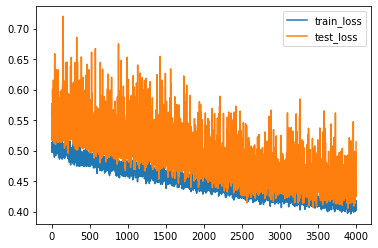

In [54]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label="train_loss")
plt.plot(history.history['val_loss'],label='test_loss')
plt.legend()
plt.show()

# Verifying the model

In [ ]:
 yp=reg.predict(sc.transform([[2008,7,30]]))

In [49]:
yp 

array([[8.949772]], dtype=float32)

In [50]:
yp1=reg.predict(sc.transform([[2011,7,19]]))

In [51]:
yp1

array([[3.9736688]], dtype=float32)

In [63]:
reg.save("price.h5")

In [64]:
import joblib
joblib.dump(sc,"scaler")

['scaler']